In [124]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline



In [125]:
df = pd.read_excel('BCipca.xls')

In [126]:
df['data'] = pd.to_datetime(df['data'], dayfirst=True)

In [127]:
df.sort_values('data')
df.set_index('data', inplace=True)
df.columns = ['valor']
df.head()

,valor
data,
2013-01-01,0.92
2013-02-01,1.30
2013-03-01,0.26
2013-04-01,0.54
2013-05-01,0.56


In [128]:
meses = 15
treino = df.iloc[:-meses,0:1].copy()
teste = df.iloc[-meses:,0:1].copy()

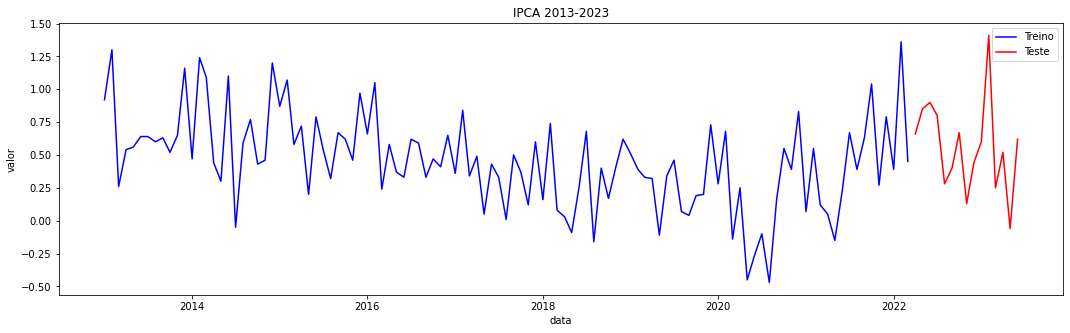

In [129]:
plt.figure(figsize=(18,5))
plt.title('IPCA 2013-2023')
plt.plot(treino['valor'], color='b')
plt.plot(teste['valor'], color='red')
plt.legend(['Treino','Teste'])
plt.xlabel('data')
plt.ylabel('valor')
plt.show()


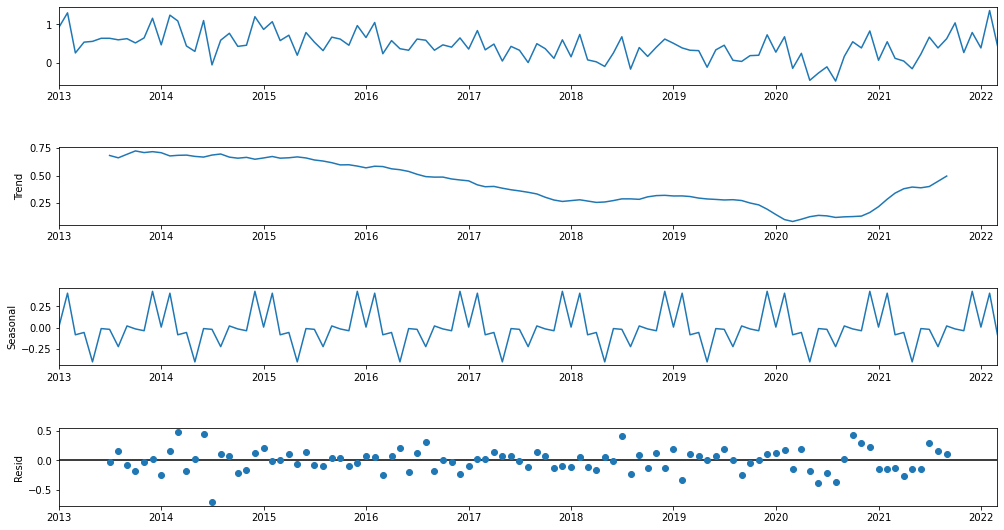

In [130]:
season = seasonal_decompose(treino, period=12)
fig = season.plot();
fig.set_size_inches(16,8)

In [131]:
adfinput = adfuller(treino['valor'])
adftest = pd.Series(adfinput[0:4], index=['Teste Estatistico Dickey Fuller','Valor-P',
                                          'Lags Usados','Número de observações usadas'])

In [132]:
adftest = round(adftest,4)
    
for key, value in adfinput[4].items():
    adftest["Valores Críticos (%s)"%key] = value.round(4) 
adftest

Teste Estatistico Dickey Fuller    -1.2224
Valor-P                             0.6639
Lags Usados                        11.0000
Número de observações usadas       99.0000
Valores Críticos (1%)              -3.4982
Valores Críticos (5%)              -2.8912
Valores Críticos (10%)             -2.5826
dtype: float64

In [133]:
kpss_input = kpss(treino['valor'])
kpss_test = pd.Series(kpss_input[0:3], index=['Teste KPSS','Valor-P','Lagss'])
kpss_test = round(kpss_test,4)
    
for key, value in kpss_input[3].items():
    kpss_test["Valores Críticos (%s)"%key] = value 
kpss_test

c:\users\erikc\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


Teste KPSS                 0.9363
Valor-P                    0.0100
Lagss                      5.0000
Valores Críticos (10%)     0.3470
Valores Críticos (5%)      0.4630
Valores Críticos (2.5%)    0.5740
Valores Críticos (1%)      0.7390
dtype: float64

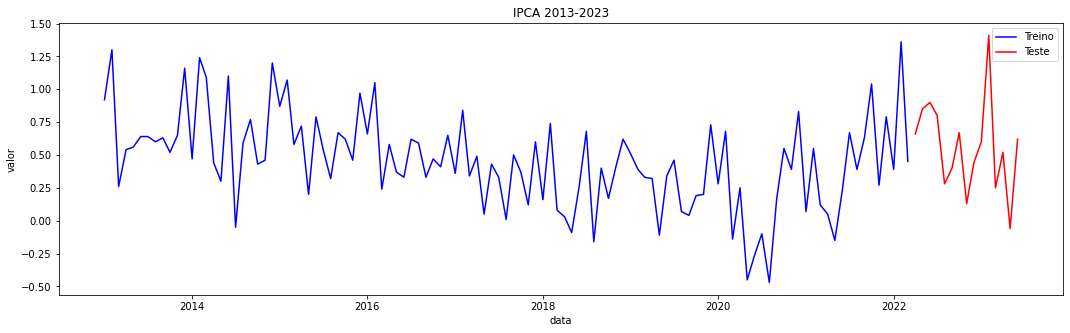

In [134]:
plt.figure(figsize=(18,5))
plt.title('IPCA 2013-2023')
plt.plot(treino['valor'], color='b')
plt.plot(teste['valor'], color='red')
plt.legend(['Treino','Teste'])
plt.xlabel('data')
plt.ylabel('valor')
plt.show()

In [135]:
novo = treino['valor'].diff().diff().dropna().head(60)

In [136]:
import seaborn as sns
from math import sqrt
def checar_estacionariedade(y, lags_plots=48, figsize=(22,8)):
    "Use Series como parâmetro"
    
    # Criando plots do DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize, color='teal')
    ax1.set_title('IPCA')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2, color='teal');
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3, method='ols', color='teal');
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4, color='teal')
    ax4.set_title('Dist IPCA')

    plt.tight_layout()
    
    print('Resultados do teste de Dickey-Fuller:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Teste Statistico','Valor-P','Lags Usados','Números de Observações'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Valores Críticos (%s)"%key] = value.round(4)
        
    print(adftest)

c:\users\erikc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



Resultados do teste de Dickey-Fuller:
Teste Statistico          -8.8949
Valor-P                    0.0000
Lags Usados               12.0000
Números de Observações    96.0000
Valores Críticos (1%)     -3.5004
Valores Críticos (5%)     -2.8922
Valores Críticos (10%)    -2.5831
dtype: float64


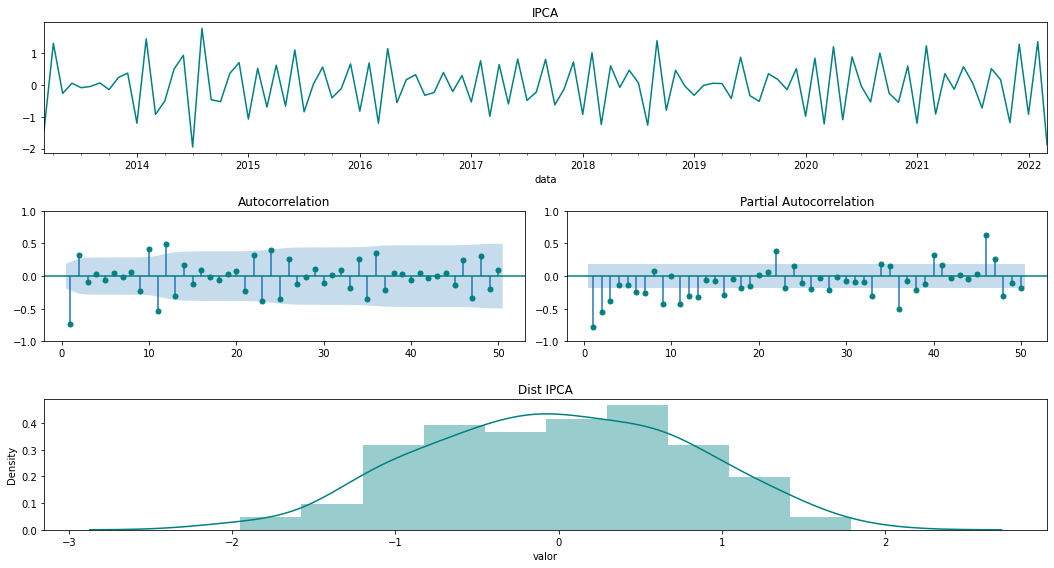

In [137]:
checar_estacionariedade(treino['valor'].diff().diff().dropna(), lags_plots=50)

In [138]:
from statsmodels.tsa.arima.model import ARIMA



In [139]:
treino.head()

,valor
data,
2013-01-01,0.92
2013-02-01,1.30
2013-03-01,0.26
2013-04-01,0.54
2013-05-01,0.56


In [153]:
modelo = ARIMA(treino, order=(1,2,3))


c:\users\erikc\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\erikc\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\erikc\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [154]:
result_AR = modelo.fit()

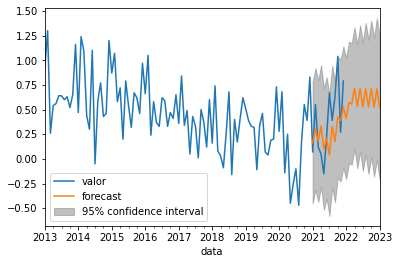

<Figure size 1440x360 with 0 Axes>

In [168]:
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
ax = treino.loc['2013':'2021'].plot(ax=ax)
plot_predict(result_AR, '2021', '2023', ax=ax)
plt.figure(figsize=(20, 5)) 
plt.show()




In [ ]:
plot_predict

In [86]:
pred_treino[:10]

2013-01-01    0.000000
2013-02-01    1.380000
2013-03-01    1.680000
2013-04-01    0.276639
2013-05-01    0.024503
2013-06-01    0.353406
2013-07-01    0.260395
2013-08-01    0.500950
2013-09-01    0.376079
2013-10-01    0.538069
Freq: MS, Name: predicted_mean, dtype: float64

In [92]:
treino['Predição'] = pred_treino
treino.dropna(inplace=True)
treino

,valor,Predição
data,,
2013-01-01,0.92,0.000000
2013-02-01,1.30,1.380000
2013-03-01,0.26,1.680000
2013-04-01,0.54,0.276639
2013-05-01,0.56,0.024503
...,...,...
2021-11-01,0.27,0.387158
2021-12-01,0.79,0.525662
2022-01-01,0.39,0.408872


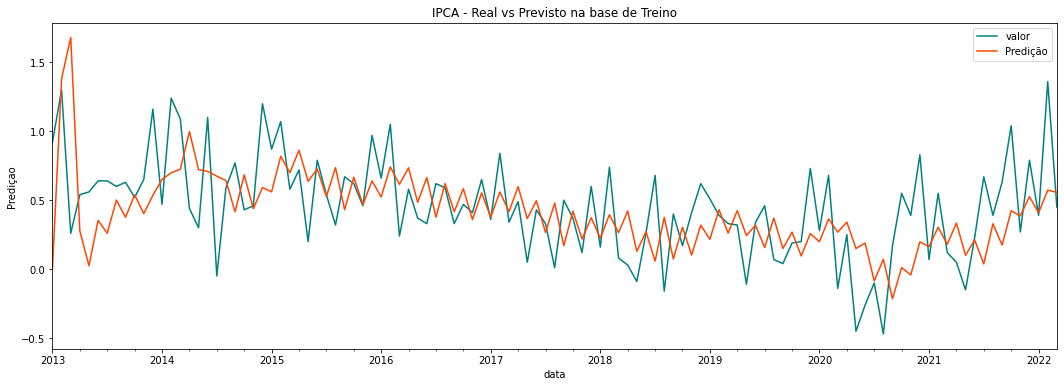

In [88]:
# Plotando o gráfico
treino.plot(figsize=(18,6), 
            title='IPCA - Real vs Previsto na base de Treino',
           color=['Teal','orangered'])
plt.ylabel('Prediçao')
plt.show()

In [89]:
from sklearn.metrics import mean_squared_error
from math import sqrt
erro = sqrt(mean_squared_error(treino['valor'], treino['Predição']))
print(f'O RMSE foi de % {round(erro,2)}')

O RMSE foi de % 0.36


In [34]:
const, lag1, lag2 = modelo.params
print(f'Valor da constante {round(const,4)}')
print(f'Coeficientes do Lag 1: {round(lag1,4)}, e Lag 2: {round(lag2,4)}')

Valor da constante -1.1994
Coeficientes do Lag 1: -0.5527, e Lag 2: 0.1797


In [54]:
def prever_n_per(treino, teste, passos):
    
    # Adicionando a série com diferenciação para projetar previsões
    diff_treino = treino.diff().diff().dropna().values
    hist = [x for x in diff_treino]

    diff_teste = teste.diff().dropna().values
    diff_teste = [x for x in diff_teste]

    # Adicionando primeira diferenciação no teste que ficou entre o treino e teste
    prim_diff = teste[0] - treino[-1]
    diff_teste.insert(0, prim_diff)
    
    prev = []

    for i in range(0,len(teste),passos):
        for j in range(passos):
    
            yhat = const + (l1 * hist[-1]) + (l2 * hist[-2])
            prev.append(yhat)
            # usando a previsão atual como base para novas previsões
            hist.append(yhat)
        obs = diff_teste[i:i+passos]
        hist = list(np.append(hist,obs))
    return prev

In [55]:
steps = 3
prev = prever_n_per(treino['valor'], teste['valor'], passos=steps)
print('Previsões antes de reverter os valores: ')
print(prev[:3])

Previsões antes de reverter os valores: 
[0.08580938081697556, -1.5845697507466425, -0.3081961716461675]


In [56]:
def inverter_diff(treino, teste, previsão, passos):
    '''
    Usando o último mes da base de treino, após isso, usa o último valor previsto como base sucessivamente.
    
    A cada passo, volta a usar o primeiro valor da base de teste que se tornou real.
    '''
    treino = [x for x in treino]
    teste = [x for x in teste]
    prev_inv = []
    
    for i in range(0,len(teste), passos): 
        inverter = previsão[i] + treino[-1]
        prev_inv.append(inverter)
        
        for j in range(passos-1):
            inverter += previsão[i+j+1]
            prev_inv.append(inverter)
        treino = np.append(treino, teste[i:i+passos])
    return prev_inv

In [57]:
# Adicionando a previsão na base de testes para comparar posteriormente
teste['Previsão 3Meses'] = inverter_diff(treino['valor'],
                                    teste['valor'],
                                    prev, passos=steps)

In [58]:
def plotar_comparativo(orig, prev, passos, titulo='', figsize=(18,8)):
    plt.figure(figsize=figsize)
    
    orig = np.array(orig)
    prev = np.array(prev)
    plt.plot(orig, label='Real', color='teal')
    
    for i in range(0,len(orig), passos):
        eixo_x = [x for x in range(i,i+passos)]
        plt.plot(eixo_x, prev[i:i+passos], color='orangered')
    
    plt.title(titulo)
    plt.ylabel('valor')
    plt.show()

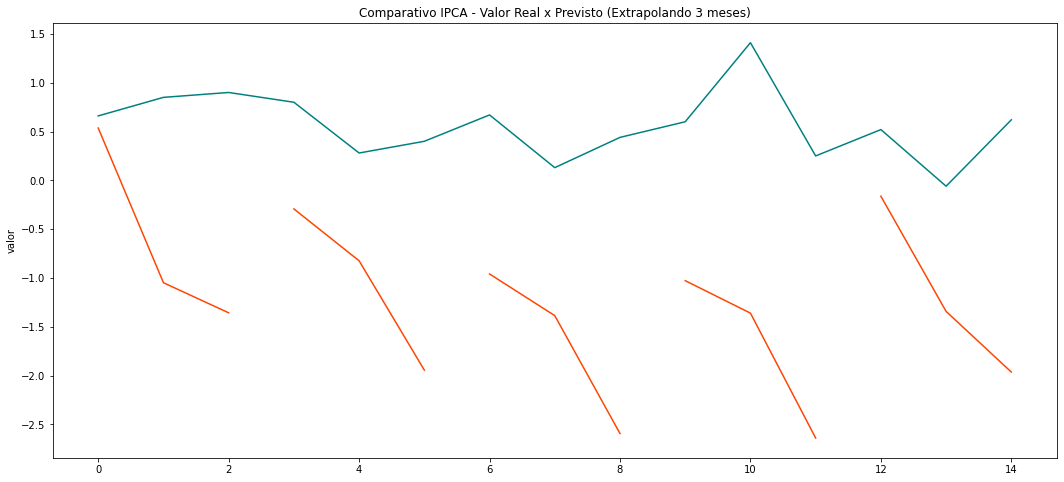

In [59]:
plotar_comparativo(teste['valor'], teste['Previsão 3Meses'], passos=steps, 
                   titulo='Comparativo IPCA - Valor Real x Previsto (Extrapolando 3 meses)')

In [60]:
erro_teste = sqrt(mean_squared_error(teste['valor'], teste['Previsão 3Meses']))
print(f'O RMSE da base de testes foi de % {round(erro_teste,4)}')

O RMSE da base de testes foi de % 1.9704


In [61]:
def erro_n_passos(orig, prev, passos, plot=True):
    # Calculando o RMSE de cada linha
    erro = ((np.array(orig) - np.array(prev))**2)**(1/2)
    
    # Mudando o formato para ficar: (erros/exemplos, passos)
    erro = erro.reshape(int(len(erro)/passos), passos)
    
    # Fazendo a média do erro para cada passo
    media = erro.mean(axis=0)
    
    # Plotando o gráfico de erro
    if plot:
        indice = np.arange(0,passos)
        plt.figure(figsize=(12,4))
        plt.plot(media, 'o-', color='teal', markersize=8)
        plt.title('Erro Médio para Cada Passo', fontsize=15)
        plt.xlabel('Passos', fontsize=15)
        plt.ylabel('Erro', fontsize=15)
        for x,y in zip(indice, media):
            label = "{:.4f}".format(y)
            plt.annotate(label, (x, y), xytext=(x-0.1, y+.075), fontsize=12)
        plt.xticks(np.arange(passos), [x for x in range(1,passos+1)])
        plt.yticks([x for x in np.linspace(min(media)-0.2, max(media)+0.2, 10)])
        plt.grid(axis='y')
        plt.show()
    print(f'O RMSE para cada passo ficou assim: \n{media}')

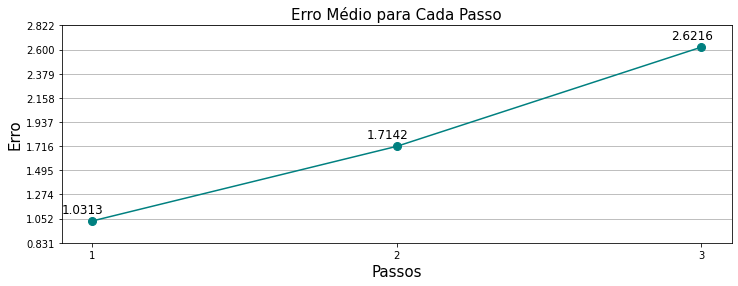

O RMSE para cada passo ficou assim: 
[1.03132523 1.71422799 2.62161943]


In [62]:
erro_passo = erro_n_passos(teste['valor'], teste['Previsão 3Meses'], steps)
erro_passo